In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

def linearData(n_sample=400):
	theta = np.random.rand() * 2 * np.pi
	w_star = np.array([[np.cos(theta), np.sin(theta)]])
	margin = 0.1
	noise = 0.1
	#  create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	label = (X @ w_star.T) > 0
	label = label.astype(float)
	# create margin
	idx = (label * (X @ w_star.T)) < margin
	X = X + margin * ((idx * label) @ w_star)
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def XORData(n_sample=400):
	margin = 0.1
	noise = 0.1
	# create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	label = (X[:, 0] * X[:, 1]) > 0
	label = label.astype(float).reshape((-1, 1))
	# create margin
	pos_flag = X >= 0
	X = X + 0.5 * margin * pos_flag
	X = X - 0.5 * margin * (~pos_flag)
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def circleData(n_sample=400):
	noise = 0.05
	# create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	dist = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
	label = dist <= 0.5
	label = label.astype(float).reshape((-1, 1))
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def sinusoidData(n_sample=400):
	noise = 0.05
	# create data
	X = 2 * np.random.rand(n_sample, 2) - 1
	label = (np.sin(np.sum(X, axis=- 1) * 2 * np.pi) > 0)
	label = label.astype(float).reshape((-1, 1))
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def swissrollData(n_sample=400):
	noise = 0.05
	nHalf = int(n_sample / 2)
	# create data
	t = np.random.rand(nHalf, 1)
	x1 = t * np.cos(2 * np.pi * t * 2)
	y1 = t * np.sin(2 * np.pi * t * 2)
	t = np.random.rand(n_sample - nHalf, 1)
	x2 = (-t) * np.cos(2 * np.pi * t * 2)
	y2 = (-t) * np.sin(2 * np.pi * t * 2)
	xy1 = np.concatenate([x1, y1], axis=1)
	xy2 = np.concatenate([x2, y2], axis=1)
	X = np.concatenate([xy1, xy2], axis=0)
	label = np.concatenate([np.ones((nHalf, 1)), np.zeros((n_sample - nHalf, 1))], axis=0)
	# add noise
	noise_x = noise * (2 * np.random.rand(n_sample, 2) - 1)
	X = X + noise_x
	return X, label


def sample_data(data_name='circle', nTrain=200, nTest=200, random_seed=0):
	"""
	Data generation function
	:param data_name: linear-separable, XOR, circle, sinusoid, swiss-roll
	:return:
	"""
	random.seed(random_seed)
	np.random.seed(random_seed)
	n_sample = nTrain + nTest
	if data_name == 'linear-separable':
		X, label = linearData(n_sample)
	elif data_name == 'XOR':
		X, label = XORData(n_sample)
	elif data_name == 'circle':
		X, label = circleData(n_sample)
	elif data_name == 'sinusoid':
		X, label = sinusoidData(n_sample)
	elif data_name == 'swiss-roll':
		X, label = swissrollData(n_sample)
	else:
		raise NotImplementedError


	indices = np.random.permutation(n_sample)
	train_idx, test_idx = indices[:nTrain], indices[nTrain:]
	x_train = X[train_idx]
	y_train = label[train_idx]
	x_test = X[test_idx]
	y_test = label[test_idx]
	return x_train, y_train, x_test, y_test


def plot_loss(logs):
	"""
	Function to plot training and validation/test loss curves
	:param logs: dict with keys 'train_loss','test_loss' and 'epochs', where train_loss and test_loss are lists with 
				the training and test/validation loss for each epoch
	"""
	plt.figure(figsize=(20, 8))
	plt.subplot(1, 2, 1)
	t = np.arange(len(logs['train_loss']))
	plt.plot(t, logs['train_loss'], label='train_loss', lw=3)
	plt.plot(t, logs['test_loss'], label='test_loss', lw=3)
	plt.grid(1)
	plt.xlabel('epochs',fontsize=15)
	plt.ylabel('loss value',fontsize=15)
	plt.legend(fontsize=15)

def plot_decision_boundary(X, y, pred_fn, boundry_level=None):
    """
    Plots the decision boundary for the model prediction
    :param X: input data
    :param y: true labels
    :param pred_fn: prediction function,  which use the current model to predict。. i.e. y_pred = pred_fn(X)
    :boundry_level: Determines the number and positions of the contour lines / regions.
    :return:
    """
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = pred_fn(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7, levels=boundry_level, cmap='viridis_r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), alpha=0.7,s=50, cmap='viridis_r',)

In [2]:
import numpy as np
from numpyNN import *

class MLP:
    def __init__(self, n_layers, width_layers, init, activation_per_layer, opt_loss, optimizer):
        self.width_layers = width_layers
        self.init = init
        self.weights, self.derivatives = self.initialization()
        self.act_per_layers = activation_per_layer
        self.opt_loss = opt_loss
        self.optimizer = optimizer
        self.lr = 0.001
        self.velocity = [np.zeros_like(weight) for weight in self.weights]
        self.momentum = 0.9
        self.beta1 = 0.9
        self.beta2 = 0.99
        self.epsilon = 1e-8
        self.moment1 = [np.zeros_like(weight) for weight in self.weights]
        self.moment2 = [np.zeros_like(weight) for weight in self.weights]
        self.t = 0
        
        forward_activations  = []
        for i in range(len(self.width_layers)):
            layer = np.zeros(self.width_layers[i])
            forward_activations.append(layer)
        self.activations = forward_activations
    
    def initialization(self):
        weights = []
        derivatives = []

        if self.init == 'He':
            for i in range(len(self.width_layers)-1):
                k = 2/ (self.width_layers[i])
                weight = np.sqrt(k)* np.random.randn(self.width_layers[i+1], self.width_layers[i])
                derivative = np.random.randn(self.width_layers[i+1], self.width_layers[i])
                weights.append(weight)
                derivatives.append(derivative)

        elif self.init == 'Xe':
            for i in range(len(self.width_layers)-1):
                k = 1/ (self.width_layers[i] )
                weight = np.sqrt(k) * np.random.randn(self.width_layers[i+1], self.width_layers[i])
                derivative = np.random.randn(self.width_layers[i], self.width_layers[i+1])
                weights.append(weight)
                derivatives.append(derivative)
        return weights, derivatives
    
    def activation(self, activation_fnc, x):
        if activation_fnc == 'sigmoid':
            fnc_val = 1/(1 + np.exp(-x))
            derivative = fnc_val * (1-fnc_val)
        
        elif activation_fnc == 'relu':
            fnc_val = np.maximum(0, x)
            derivative = np.where(x<=0, 0, 1)
        
        elif activation_fnc =='tanh':
            fnc_val = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
            derivative = 1 - (fnc_val**2)

        return fnc_val, derivative
    
    
    def loss_fnc(self, y_preds, y_true):
        if self.opt_loss == 'l2loss':
            loss_val = (y_true - y_preds)**2
            loss_der = 2*(y_preds - y_true)
        
        if self.opt_loss == 'cross_entropy_loss':
            epsilon = 1e-5
            loss_val = np.sum(-1 * (y_true * np.log(y_preds + epsilon) + (1 - y_true) * np.log(1 - y_preds + epsilon)))
            loss_der = (y_preds - y_true) / ((y_preds * (1 - y_preds)) + epsilon)

        return loss_val, loss_der
    
    
    def forward(self, X):
        forward_activation = X
        self.activations[0] = forward_activation
        for i in range(len(self.width_layers)-1):
            pre_acts = self.weights[i] @ forward_activation
            activation_fnc = self.act_per_layers[i]
            forward_activation, _ = self.activation(activation_fnc, pre_acts)
            self.activations[i+1] = forward_activation
        return forward_activation
    
    def backward(self, loss_gradient):
        loss_gradient = loss_gradient.reshape(-1,1)
        for i in reversed(range(len(self.weights))):
            activation_fnc = self.act_per_layers[i]
            _, activation_derivative = self.activation(activation_fnc, self.activations[i+1])
            if (type(activation_derivative)==int):
                activation_derivative = np.array([activation_derivative]).reshape(-1,1)
            else:
                activation_derivative = activation_derivative.reshape(-1,1)
            delta = loss_gradient * activation_derivative
            act_before = self.activations[i]
            act_before = act_before.reshape(-1,1)
            self.derivatives[i] = delta @ act_before.T
            loss_gradient = (self.weights[i].T @ delta)
    
    def gradient_descent(self):
        if self.optimizer == 'vanilla_gradient':
            for i in range(len(self.width_layers) - 1):
                self.weights[i] = self.weights[i] - self.lr * self.derivatives[i]
        if self.optimizer == 'momentum':
            for i in range(len(self.width_layers)- 1):
                self.velocity[i] = self.momentum * self.velocity[i] + (1 - self.momentum) * self.derivatives[i]
                self.weights[i] -= self.lr * self.velocity[i]
        if self.optimizer =='adam':
            self.t += 1
            for i in range(len(self.width_layers) - 1):
                self.moment1[i] = self.beta1 * self.moment1[i] + (1 - self.beta1) * self.derivatives[i]
                self.moment2[i] = self.beta2 * self.moment2[i] + (1 - self.beta2) * (self.derivatives[i] ** 2)
                m_hat = self.moment1[i] / (1 - self.beta1 ** self.t)
                v_hat = self.moment2[i] / (1 - self.beta2 ** self.t)
                self.weights[i] -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

Training loss at epoch number: 0: 0.08492135000687963
Training loss at epoch number: 1: 0.05897029238439837
Training loss at epoch number: 2: 0.05566323642089554
Training loss at epoch number: 3: 0.053949940815699565
Training loss at epoch number: 4: 0.0529856586123053
Training loss at epoch number: 5: 0.0524271540455231
Training loss at epoch number: 6: 0.0521003667653377
Training loss at epoch number: 7: 0.051899040898590966
Training loss at epoch number: 8: 0.05176610039596998
Training loss at epoch number: 9: 0.05167432640690496
Training loss at epoch number: 10: 0.051606886657903174
Training loss at epoch number: 11: 0.05155348338772726
Training loss at epoch number: 12: 0.0515087292854727
Training loss at epoch number: 13: 0.0514690732293721
Training loss at epoch number: 14: 0.05143307220116453
Training loss at epoch number: 15: 0.0513988082052073
Training loss at epoch number: 16: 0.05136569086248409
Training loss at epoch number: 17: 0.0513333225300331
Training loss at epoch n

Training loss at epoch number: 176: 0.04733577775240315
Training loss at epoch number: 177: 0.04731545246493189
Training loss at epoch number: 178: 0.04729517417506204
Training loss at epoch number: 179: 0.047274942738095765
Training loss at epoch number: 180: 0.04725475800982764
Training loss at epoch number: 181: 0.04723461984654424
Training loss at epoch number: 182: 0.04721452810502381
Training loss at epoch number: 183: 0.047194482642535576
Training loss at epoch number: 184: 0.04717448331683858
Training loss at epoch number: 185: 0.04715452998618064
Training loss at epoch number: 186: 0.047134622509297036
Training loss at epoch number: 187: 0.047114760745409115
Training loss at epoch number: 188: 0.047094944554222785
Training loss at epoch number: 189: 0.047075173795927065
Training loss at epoch number: 190: 0.0470554483311925
Training loss at epoch number: 191: 0.04703576802116948
Training loss at epoch number: 192: 0.0470161327274867
Training loss at epoch number: 193: 0.046996

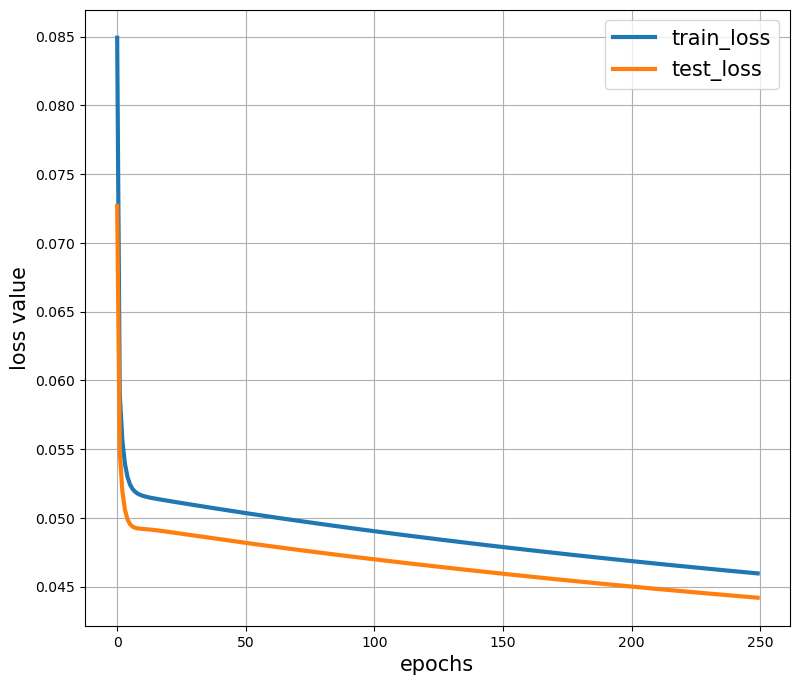

[0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0
 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0
 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0]


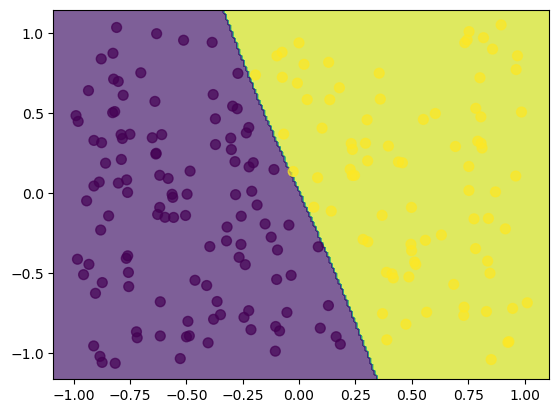

In [3]:
x_train, y_train, x_test, y_test = sample_data('linear-separable', 200, 200, 0)
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)


n_epochs = 250
mlp = MLP(3, [2,100,1], 'He', ['sigmoid', 'relu', 'sigmoid'], 'l2loss', 'vanilla_gradient')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'Training loss at epoch number: {epoch}: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(x_test)
print(preds)
plot_decision_boundary(x_test, y_test, predict_fn)
plt.show()  

loss: 0.6810275850105642
loss: 0.6657349850630555
loss: 0.6536583242004393
loss: 0.642813957643224
loss: 0.632972744747727
loss: 0.6236054034916151
loss: 0.6150074098464148
loss: 0.6071777143361892
loss: 0.5997720959383409
loss: 0.5927031614298707
loss: 0.5857528411425005
loss: 0.5789628933104509
loss: 0.5723363210544685
loss: 0.565841541062123
loss: 0.559379432728419
loss: 0.5529051007958026
loss: 0.5463218499500441
loss: 0.5396681176855737
loss: 0.5329919548018003
loss: 0.5263156963571616
loss: 0.519653541736577
loss: 0.5129898628261755
loss: 0.506308820379279
loss: 0.4996048322991398
loss: 0.4929301179980257
loss: 0.48629164417520715
loss: 0.4796393688980009
loss: 0.47302375717696166
loss: 0.4663753320956529
loss: 0.45976279691227406
loss: 0.45312242621688353
loss: 0.4464862314719687
loss: 0.43986623008741815
loss: 0.4332801965099731
loss: 0.42672453339836836
loss: 0.42018232519631626
loss: 0.4136433961418538
loss: 0.40708830801934026
loss: 0.40056705800524595
loss: 0.39405701286774

loss: 0.01548869695359517
loss: 0.01540314199890744
loss: 0.01532321054792724
loss: 0.015268465171716072
loss: 0.015175992814992188
loss: 0.015099600048456487
loss: 0.015046023667864308
loss: 0.01495791672918415
loss: 0.014883925531461416
loss: 0.014833261114595632
loss: 0.014751106507940008
loss: 0.014684757984406951
loss: 0.014638229317095422
loss: 0.01455864970278788
loss: 0.014489346689360909
loss: 0.014441659605049837
loss: 0.014363197101543683
loss: 0.014293473492809248
loss: 0.014248689624496762
loss: 0.014170231166453813
loss: 0.01410382500203108
loss: 0.014062411880652612
loss: 0.013985548683966585
loss: 0.013921726118297027
loss: 0.013879448314950632
loss: 0.01380726491153886
loss: 0.013730910448249726
loss: 0.013712531055729336
loss: 0.013615195073601967
loss: 0.013572188571738373
loss: 0.013544796261373759
loss: 0.013452431179421322
loss: 0.013413422766521495
loss: 0.013354382382257621
loss: 0.013286012490500276
loss: 0.013261650204789723
loss: 0.013179020043008647
loss: 0.

loss: 0.008814342167304196
loss: 0.008807389687480205
loss: 0.008799612572311537
loss: 0.008791935193127454
loss: 0.00878385818994498
loss: 0.008775253759734201
loss: 0.008768318154306598
loss: 0.00875995829543404
loss: 0.008751369606019164
loss: 0.008744641094100414
loss: 0.008736595702644281
loss: 0.008728628332606559
loss: 0.00872046580850351
loss: 0.008713533527460042
loss: 0.008705432466771603
loss: 0.008697890061727135
loss: 0.00868901422215461
loss: 0.008681509976331459
loss: 0.00867408601127469
loss: 0.008666129314496743
loss: 0.008658035156459427
loss: 0.008650818618183063
loss: 0.00864351932833636
loss: 0.008634395576085155
loss: 0.008627272629182774
loss: 0.008619592467306553
loss: 0.00861197787018936
loss: 0.008604097145884573
loss: 0.008595928424674286
loss: 0.008588975927458043
loss: 0.008581826133451036
loss: 0.008573354120507469
loss: 0.00856540954501695
loss: 0.008558401201588938
loss: 0.00854959042255279
loss: 0.008542887071457525
loss: 0.008535033353208949
loss: 0.00

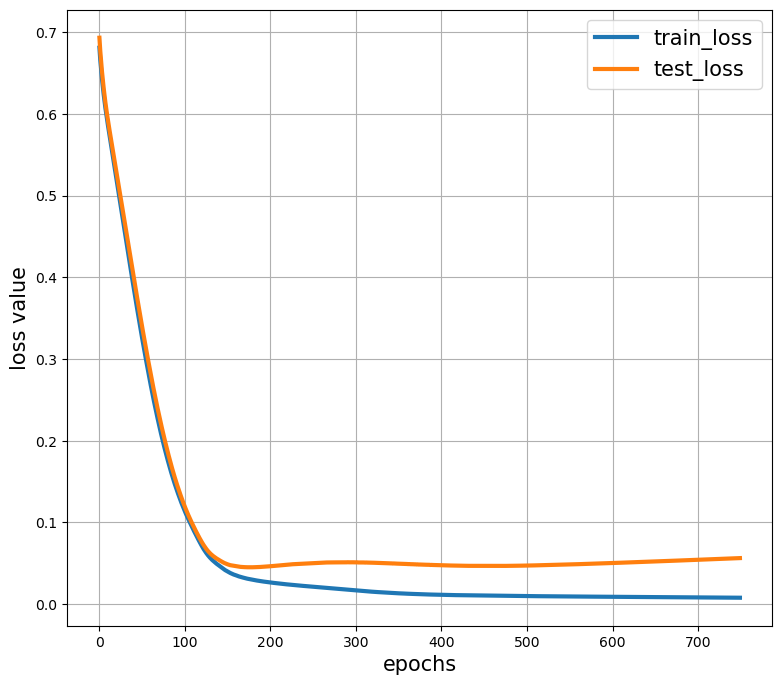

[1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0
 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


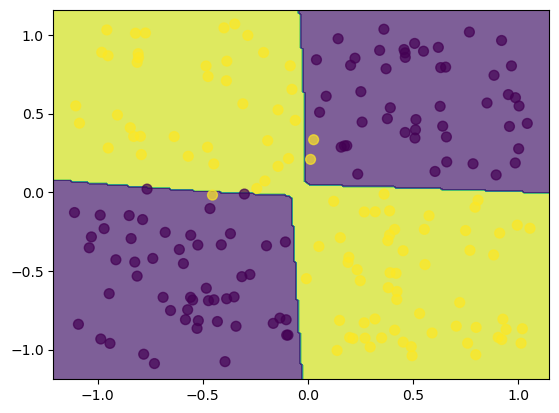

In [4]:
x_train, y_train, x_test, y_test = sample_data('XOR', 200, 200, 0)
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)

n_epochs = 750
mlp = MLP(4, [2, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'vanilla_gradient')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(x_test)
print(preds)
plot_decision_boundary(x_test, y_test, predict_fn)
plt.show()  

loss: 0.5771754674818134
loss: 0.5342832836345508
loss: 0.5295146948382576
loss: 0.5264115245767387
loss: 0.5234983652043357
loss: 0.5207592767658776
loss: 0.5181695816644692
loss: 0.5156565895062561
loss: 0.5130719513376265
loss: 0.5103458100862069
loss: 0.5071692603860839
loss: 0.5035239029879763
loss: 0.4997458382422794
loss: 0.4960621543743604
loss: 0.49221995184888856
loss: 0.48874223490427715
loss: 0.4853002006837652
loss: 0.4826493363038729
loss: 0.480118277996401
loss: 0.4778651488156285
loss: 0.4757298988063357
loss: 0.4736637261621827
loss: 0.4715610028049771
loss: 0.46937549967826536
loss: 0.46742030069943247
loss: 0.46547801657894117
loss: 0.4635160268126923
loss: 0.4616128107432457
loss: 0.45960816144001515
loss: 0.4576180564552908
loss: 0.4556285929441428
loss: 0.45373047597682686
loss: 0.4517664951237543
loss: 0.44974262642029883
loss: 0.4477086094624767
loss: 0.4456569490065045
loss: 0.44370877454759855
loss: 0.44169774444965
loss: 0.4396823584095168
loss: 0.43758700479

loss: 0.08145383816605804
loss: 0.08099974904287804
loss: 0.08058168918085527
loss: 0.08026003133063327
loss: 0.0801661076311003
loss: 0.07990637221294454
loss: 0.07969317088142856
loss: 0.07943059222772698
loss: 0.07919787058733369
loss: 0.07918493239111925
loss: 0.07878619990263656
loss: 0.07890646478574735
loss: 0.07869272607839824
loss: 0.0781926365760106
loss: 0.0780153618342077
loss: 0.07799221707918547
loss: 0.07777064519117773
loss: 0.07743047659443304
loss: 0.07713677662397474
loss: 0.07713669543800411
loss: 0.07681396052980664
loss: 0.07645222585019132
loss: 0.07644746580434669
loss: 0.07619507869143675
loss: 0.07586043453429543
loss: 0.07587967157840993
loss: 0.07567840887689448
loss: 0.07536878543148878
loss: 0.07539941643708131
loss: 0.0750703009491124
loss: 0.07485968203025722
loss: 0.07474156325260997
loss: 0.07489458167764595
loss: 0.07440486875101053
loss: 0.07426490896664815
loss: 0.07408891328305395
loss: 0.07382487354977335
loss: 0.07396495622337816
loss: 0.07360916

loss: 0.05206200449593519
loss: 0.05231887970792646
loss: 0.0521690981507543
loss: 0.05201085146508839
loss: 0.05202557403370731
loss: 0.05186900914382356
loss: 0.05195741354547757
loss: 0.05194080263465722
loss: 0.051986121475795635
loss: 0.05181231697878948
loss: 0.051539854130582416
loss: 0.05163086747208281
loss: 0.05171444655771618
loss: 0.051728934780231654
loss: 0.05138143994502878
loss: 0.051621795865851805
loss: 0.05155116055916996
loss: 0.05134324452983967
loss: 0.05126798585267139
loss: 0.051452961303468374
loss: 0.05123787089842351
loss: 0.05134439849659614
loss: 0.05116901615866098
loss: 0.051115864231193624
loss: 0.05107409515783727
loss: 0.051111380616355666
loss: 0.051143908671027756
loss: 0.050856425123802645
loss: 0.050897853087052365
loss: 0.05090061571105344
loss: 0.05085158937345394
loss: 0.05088388893231381
loss: 0.050672055704960355
loss: 0.0506603838962247
loss: 0.05062146391046502
loss: 0.050704537496121284
loss: 0.05060519430041119
loss: 0.05048656921325633
lo

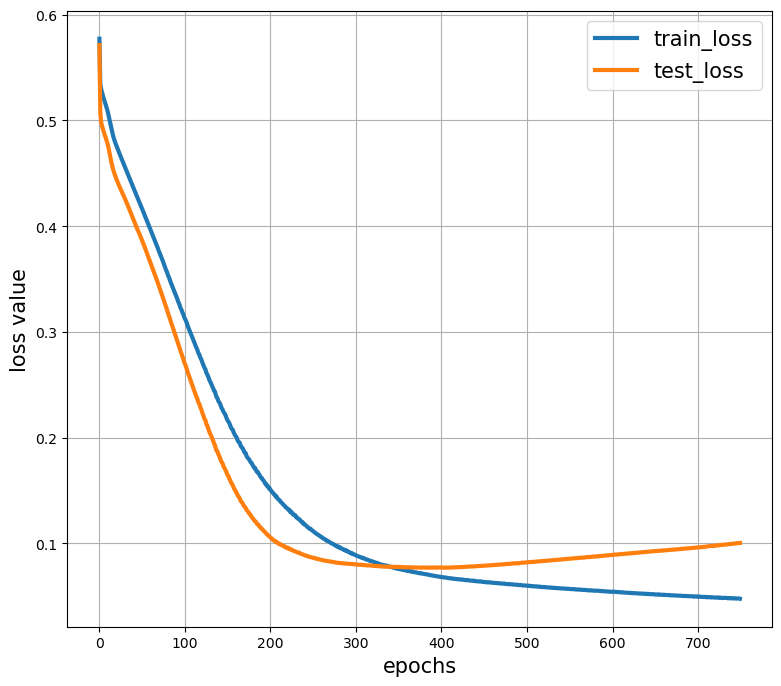

[1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0]


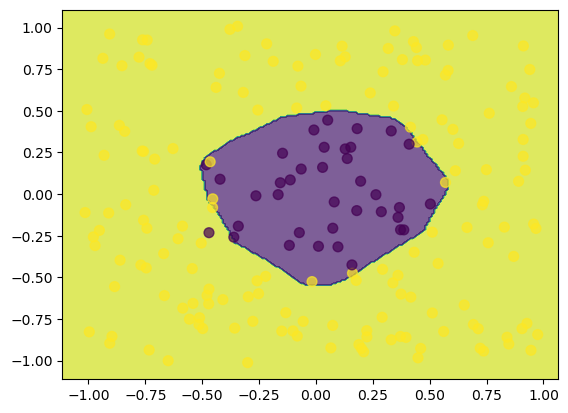

In [5]:
#circle and cross entropy loss
#deliverable 4
x_train, y_train, x_test, y_test = sample_data('circle', 200, 200, 0)
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)

n_epochs = 750
mlp = MLP(4, [2, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'vanilla_gradient')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(x_test)
print(preds)
plot_decision_boundary(x_test, y_test, predict_fn)
plt.show()  

loss: 0.20819069807067284
loss: 0.18401308539359626
loss: 0.17768015266132295
loss: 0.17556778718454372
loss: 0.17460690796956915
loss: 0.17399673437611465
loss: 0.17350522393665194
loss: 0.17305577312865988
loss: 0.1726186423727986
loss: 0.1721833056951924
loss: 0.17175441822733417
loss: 0.17134150150860186
loss: 0.17094263401349669
loss: 0.17055330970509366
loss: 0.17017031285677056
loss: 0.16979153749074163
loss: 0.16942472839344236
loss: 0.16906126897262183
loss: 0.16869521824962902
loss: 0.1683342828632644
loss: 0.16797450549328502
loss: 0.16761276410173387
loss: 0.16724018515299924
loss: 0.1668639266287323
loss: 0.16648562222245025
loss: 0.16609558168955538
loss: 0.16567901797149026
loss: 0.16523517280143338
loss: 0.16474628730114246
loss: 0.16423491436277352
loss: 0.16374884072354337
loss: 0.16323528698412507
loss: 0.16272244036522895
loss: 0.16223136707337943
loss: 0.16170712800561193
loss: 0.16120063558522374
loss: 0.16068268901828645
loss: 0.1601348129888766
loss: 0.159600497

loss: 0.07499064747174009
loss: 0.07476063074791461
loss: 0.07456264516600657
loss: 0.07436102329733892
loss: 0.07417656274394181
loss: 0.07395871224013709
loss: 0.07375915771972932
loss: 0.07358407403048588
loss: 0.07337070995139701
loss: 0.07318227303101046
loss: 0.07297367362955498
loss: 0.07279121377735161
loss: 0.07259382232481439
loss: 0.07239059491490735
loss: 0.07221308431297042
loss: 0.07200803482364092
loss: 0.0718230876476761
loss: 0.07164056168433307
loss: 0.07145153695469764
loss: 0.07125058359938145
loss: 0.07106943205018773
loss: 0.07089617266767032
loss: 0.07070214309217063
loss: 0.070523706464102
loss: 0.0703413943345405
loss: 0.07014502309766896
loss: 0.06997988723308787
loss: 0.06977936051642764
loss: 0.06959559346003676
loss: 0.06943793820389459
loss: 0.06925210064319859
loss: 0.06906844058618698
loss: 0.06889243181194674
loss: 0.06871551867792053
loss: 0.06853348823731391
loss: 0.06836711351905815
loss: 0.06819657495124783
loss: 0.06802389980387014
loss: 0.06785412

loss: 0.04150961534391397
loss: 0.04146870263704891
loss: 0.041399439866315585
loss: 0.04136642274109415
loss: 0.04130536010137522
loss: 0.04125428221742203
loss: 0.041228472600872694
loss: 0.04116254702207536
loss: 0.04111206780219266
loss: 0.041079136270333286
loss: 0.04102357193965034
loss: 0.040975419968021745
loss: 0.04093016909557285
loss: 0.040865535468021366
loss: 0.04083588060370928
loss: 0.04079580483846477
loss: 0.040735482756283706
loss: 0.04068572720277243
loss: 0.04064920339255879
loss: 0.04058326578903693
loss: 0.04054735119792202
loss: 0.040489668104422
loss: 0.04046742458903461
loss: 0.040418389492678244
loss: 0.04036539154090715
loss: 0.04030894751887301
loss: 0.04026491124328636
loss: 0.040238092036768196
loss: 0.040172622363252204
loss: 0.040144829564735536
loss: 0.04008147549462607
loss: 0.04004039031627455
loss: 0.039992148535105694
loss: 0.0399689103973924
loss: 0.03990490917131547
loss: 0.039860123829956046
loss: 0.039819880524803265
loss: 0.0397715276681227
los

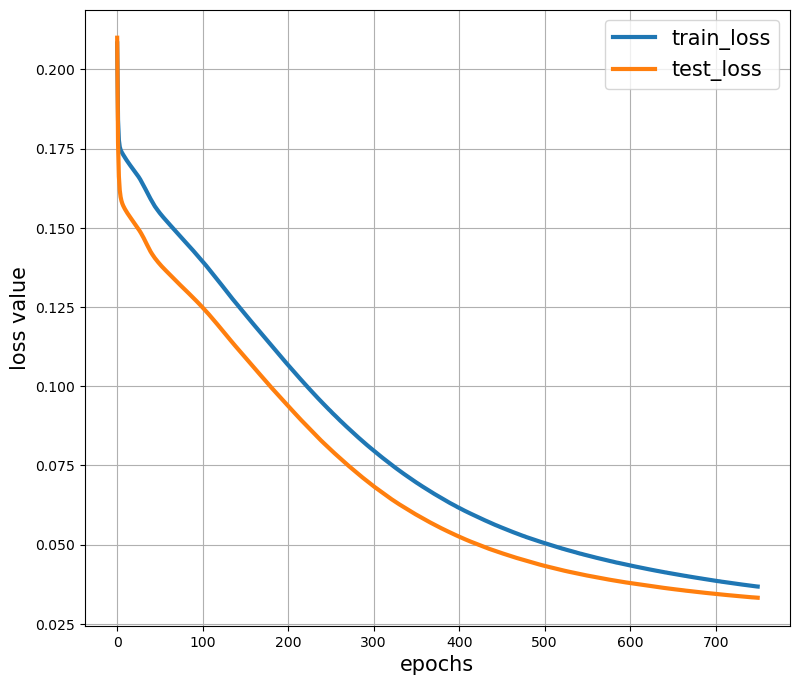

[1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0]


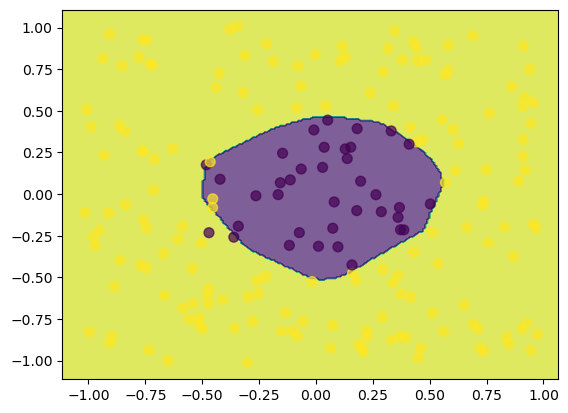

In [6]:
#circle and l2loss
#deliverable 4
x_train, y_train, x_test, y_test = sample_data('circle', 200, 200, 0)
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)

n_epochs = 750
mlp = MLP(4, [2, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'l2loss', 'vanilla_gradient')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(x_test)
print(preds)
plot_decision_boundary(x_test, y_test, predict_fn)
plt.show()  

loss: 0.7015379020727828
loss: 0.6984449289250709
loss: 0.6961471361763404
loss: 0.6943776737301696
loss: 0.6929474931857044
loss: 0.6918172667604716
loss: 0.6909152909828848
loss: 0.690184738734865
loss: 0.6895735702598381
loss: 0.6891047089661125
loss: 0.6887181964567591
loss: 0.6883717883538134
loss: 0.6880415370216862
loss: 0.6877426929837054
loss: 0.6874762252687386
loss: 0.6872263659488824
loss: 0.6869881322422913
loss: 0.6867568632467221
loss: 0.6865109554844502
loss: 0.6862960515465129
loss: 0.6861086688705741
loss: 0.6859276719762907
loss: 0.6857716724342873
loss: 0.6856055781646472
loss: 0.6854490311556541
loss: 0.6852852301496555
loss: 0.6851120892022218
loss: 0.6849427195288693
loss: 0.6847747315591132
loss: 0.6846231519498758
loss: 0.6844782282092511
loss: 0.684337345829075
loss: 0.6842090924918903
loss: 0.6840647086636286
loss: 0.6838767004892381
loss: 0.6837259687284828
loss: 0.6835660787676775
loss: 0.6834238945414713
loss: 0.6832963020208948
loss: 0.6831722822428588
lo

loss: 0.664414858772453
loss: 0.6643834579088121
loss: 0.664306852262597
loss: 0.6642653146097942
loss: 0.6641797884086474
loss: 0.6641546278207215
loss: 0.6640861387179348
loss: 0.6640182275649247
loss: 0.6639546651911121
loss: 0.6639044422797374
loss: 0.6638676577170525
loss: 0.663772740091835
loss: 0.6637465533720375
loss: 0.6636596794399625
loss: 0.6636158485306618
loss: 0.6635655108702612
loss: 0.6634843381460772
loss: 0.6634585202573927
loss: 0.6633881637003016
loss: 0.6633430201233488
loss: 0.6632694754675467
loss: 0.663239130301458
loss: 0.6631651404610546
loss: 0.6631348387978995
loss: 0.6630465063400167
loss: 0.6630060033181152
loss: 0.6629320794989171
loss: 0.6628975317071724
loss: 0.6628424481736005
loss: 0.662759685458639
loss: 0.6627221433496732
loss: 0.6626546206244274
loss: 0.6625995200418892
loss: 0.6625324112667366
loss: 0.6624659059941869
loss: 0.6624264126826813
loss: 0.662355183968121
loss: 0.6623191325766402
loss: 0.6622378889084227
loss: 0.6621955309673021
loss: 

loss: 0.643796694961612
loss: 0.6436673854657593
loss: 0.6436623318970038
loss: 0.6435403095964034
loss: 0.643442793537044
loss: 0.6434524929450728
loss: 0.6432990342895321
loss: 0.6432788228747747
loss: 0.6431490448206449
loss: 0.6431082121790804
loss: 0.6430233849194709
loss: 0.6429778851695817
loss: 0.6428984363357568
loss: 0.642821618219112
loss: 0.6427104937421357
loss: 0.6426831699601953
loss: 0.6425644221955292
loss: 0.6425180901310534
loss: 0.6424596584013129
loss: 0.6423831924862461
loss: 0.6422539548252055
loss: 0.6422134698724057
loss: 0.6421324186381289
loss: 0.6420562668373381
loss: 0.6420411517055293
loss: 0.6419304539814727
loss: 0.6417986170530984
loss: 0.6418083770398358
loss: 0.6417023826974904
loss: 0.641590422982257
loss: 0.6414921647877199
loss: 0.6415100858255576
loss: 0.6413795395278538
loss: 0.6412927322320485
loss: 0.6412645110100823
loss: 0.6411897247972353
loss: 0.6410531542187745
loss: 0.6410197918264299
loss: 0.6409174467512665
loss: 0.6408473530824395
loss

loss: 0.6141643146221072
loss: 0.6141076928485151
loss: 0.6139886575934334
loss: 0.6139234929255746
loss: 0.6137828132827192
loss: 0.6137161420898793
loss: 0.6135627969744957
loss: 0.6134837712257266
loss: 0.6133747661228555
loss: 0.6132449124312334
loss: 0.6131418675351727
loss: 0.6130558942810062
loss: 0.6130598446047106
loss: 0.6128487798656274
loss: 0.6126989397706342
loss: 0.6126012833490324
loss: 0.6125705633346121
loss: 0.6123536039625831
loss: 0.6123486249172937
loss: 0.6121335672686534
loss: 0.6120950662082294
loss: 0.6119305987175832
loss: 0.6118919546536276
loss: 0.6117205217174309
loss: 0.6115903327288699
loss: 0.611531516088856
loss: 0.6113834330824253
loss: 0.6113420931360963
loss: 0.6111542451751412
loss: 0.6111042433395859
loss: 0.610923459478184
loss: 0.610845606841114
loss: 0.6106240923197837
loss: 0.6105693390798453
loss: 0.6104876440366146
loss: 0.610320195480164
loss: 0.6101698181413395
loss: 0.6101525427489477
loss: 0.6099655160748059
loss: 0.6098259338164954
loss

loss: 0.5716372634769661
loss: 0.5713654615628233
loss: 0.5713188088332573
loss: 0.5711170539797692
loss: 0.5710878889529026
loss: 0.5707477784825904
loss: 0.5706394867701118
loss: 0.5705768178055626
loss: 0.5704349541125374
loss: 0.5703186682721791
loss: 0.5701377192264857
loss: 0.569951886415572
loss: 0.569750628208368
loss: 0.569605195608471
loss: 0.569637332383795
loss: 0.5693433090484519
loss: 0.5691652519214517
loss: 0.5689461913714787
loss: 0.5689288052200031
loss: 0.56870465434779
loss: 0.5686328575116691
loss: 0.5684136968270779
loss: 0.568399333762418
loss: 0.5681022161280572
loss: 0.5680659482030884
loss: 0.5678617837139949
loss: 0.5676390410165888
loss: 0.5674343891461215
loss: 0.5673252704156518
loss: 0.56726370654113
loss: 0.5669573311807338
loss: 0.5668596101664963
loss: 0.5667694747004208
loss: 0.5665665289139662
loss: 0.5664304296359753
loss: 0.5661216841850693
loss: 0.5660414949525253
loss: 0.5659148050521822
loss: 0.565768128974149
loss: 0.5655477846368671
loss: 0.56

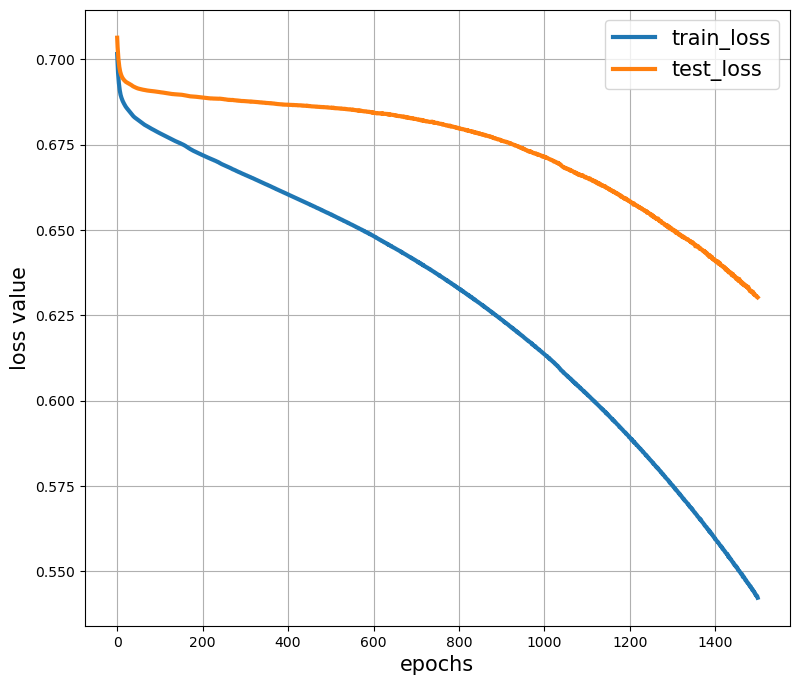

[1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0
 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1
 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0]


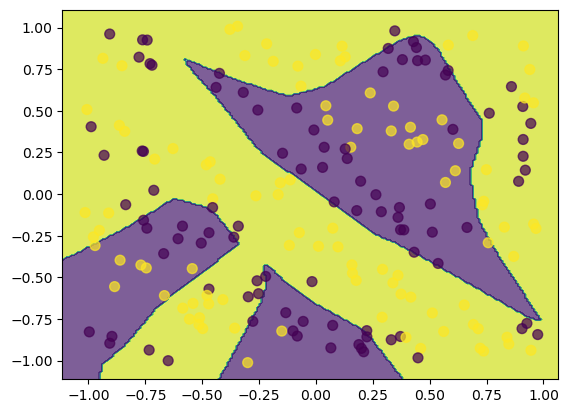

In [9]:
#deliverable 5- experimenting with various optimizers
#optimizer == vanilla gradient
x_train, y_train, x_test, y_test = sample_data('sinusoid', 200, 200, 0)
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)


n_epochs = 1500
mlp = MLP(4, [2, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'vanilla_gradient')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(x_test)
print(preds)
plot_decision_boundary(x_test, y_test, predict_fn)
plt.show()  

loss: 0.701752915584452
loss: 0.6985949637134194
loss: 0.696245897501631
loss: 0.6944532845454252
loss: 0.6930019610138402
loss: 0.691834278980203
loss: 0.6909305786180505
loss: 0.6901972404760838
loss: 0.6896041887958683
loss: 0.6891141359309563
loss: 0.6887154202231689
loss: 0.6883716366202761
loss: 0.6880395044148706
loss: 0.687737222140466
loss: 0.6874467369490557
loss: 0.6872063303665561
loss: 0.6869674097100597
loss: 0.6867377267174305
loss: 0.6865003927657233
loss: 0.6862893004149586
loss: 0.6860960047224693
loss: 0.6859252926594107
loss: 0.6857578878567483
loss: 0.6855897827602968
loss: 0.6854266327704645
loss: 0.6852561348998651
loss: 0.6850791398842974
loss: 0.6849108019328056
loss: 0.6847550322912546
loss: 0.6846007751280854
loss: 0.6844676932665172
loss: 0.6843297455316045
loss: 0.6842040282629281
loss: 0.6840862554654233
loss: 0.6839526881151724
loss: 0.6837800516593531
loss: 0.6836259609499169
loss: 0.6834688945717312
loss: 0.6833302239901314
loss: 0.6832112178212387
loss

loss: 0.6642514880796608
loss: 0.6641992450420763
loss: 0.6641280691645537
loss: 0.6640848469346079
loss: 0.6640141450363373
loss: 0.6639657493188805
loss: 0.6638930314105618
loss: 0.6638511443005917
loss: 0.6637635681008004
loss: 0.6637339142970261
loss: 0.6636685732845913
loss: 0.6636110575974695
loss: 0.6635560322035658
loss: 0.6634971047109925
loss: 0.663431479946423
loss: 0.6633624998532253
loss: 0.6633358317128365
loss: 0.6632401800990718
loss: 0.6631866454699206
loss: 0.6631322951324816
loss: 0.6630789246045569
loss: 0.6630106109842192
loss: 0.6629414525137182
loss: 0.6629221114334544
loss: 0.662823404545048
loss: 0.6627879104701989
loss: 0.6627183869164849
loss: 0.6626593617403208
loss: 0.6625778953283609
loss: 0.6625300689630155
loss: 0.662486315056209
loss: 0.6624229769596145
loss: 0.6623608123558162
loss: 0.6623298297228243
loss: 0.6622560649401973
loss: 0.6621875149213412
loss: 0.6621006483637129
loss: 0.6620848174370276
loss: 0.6620150863517226
loss: 0.6619532823018653
los

loss: 0.643446257477797
loss: 0.6433566495099273
loss: 0.6432980506086227
loss: 0.6432402516276704
loss: 0.6431725234646498
loss: 0.6430886442844637
loss: 0.6429681280981836
loss: 0.6429574482222955
loss: 0.6428782957651851
loss: 0.6427683771744666
loss: 0.6427089362364685
loss: 0.6426613279237798
loss: 0.6425113939247565
loss: 0.6425148766407887
loss: 0.6423928380435417
loss: 0.6423703240005014
loss: 0.6422377392040355
loss: 0.6422061977872356
loss: 0.642129042083105
loss: 0.6420890204877074
loss: 0.6419706470966905
loss: 0.641868569636415
loss: 0.641846873837344
loss: 0.6417367545081237
loss: 0.6416781464332098
loss: 0.6415758497677747
loss: 0.6415709089218851
loss: 0.6414240585785727
loss: 0.6413412405805679
loss: 0.6413167322066261
loss: 0.6411826750626348
loss: 0.64105022976829
loss: 0.6410297473860208
loss: 0.6409509810608958
loss: 0.6408706846260657
loss: 0.6408310404742359
loss: 0.6406160075409624
loss: 0.6406077442491661
loss: 0.6405991983933772
loss: 0.6404488655699653
loss: 

loss: 0.6126693191234016
loss: 0.6124284665948374
loss: 0.612489725128325
loss: 0.6122279648789175
loss: 0.6122048704091337
loss: 0.6121443307801306
loss: 0.6118737669731108
loss: 0.6118941670045371
loss: 0.6117122373119102
loss: 0.611682067494257
loss: 0.6115159141392685
loss: 0.6114392845756899
loss: 0.6112876694400876
loss: 0.6112128970848769
loss: 0.6110770740328223
loss: 0.6110484909326419
loss: 0.6108701881406722
loss: 0.6106775747336498
loss: 0.6106953442561043
loss: 0.6104331983506532
loss: 0.6104593345055803
loss: 0.610259663982285
loss: 0.610173563450648
loss: 0.6099993683315883
loss: 0.6100053522022182
loss: 0.6097526509703617
loss: 0.6097797895244763
loss: 0.6095167749635725
loss: 0.6094648315528152
loss: 0.6093562829730572
loss: 0.6091963351806872
loss: 0.6091428405549122
loss: 0.6090666868922439
loss: 0.6089633474936454
loss: 0.6087153120783804
loss: 0.6086904481759818
loss: 0.6084929604272572
loss: 0.6084457683993831
loss: 0.6083062744050973
loss: 0.6082303144209965
loss

loss: 0.5690878857604189
loss: 0.5690278921066537
loss: 0.5687913996912808
loss: 0.5688359294116075
loss: 0.568456922351359
loss: 0.5684777771290722
loss: 0.5681821662290845
loss: 0.5681580184813018
loss: 0.5677906191586135
loss: 0.5679028697364676
loss: 0.5675646323037541
loss: 0.5673743041210212
loss: 0.5673704899936444
loss: 0.5670797757259474
loss: 0.566984939318573
loss: 0.5668874935563825
loss: 0.5665148588660525
loss: 0.5665915559491366
loss: 0.5662521338854332
loss: 0.5662334551633172
loss: 0.5659563613690881
loss: 0.5658802466053906
loss: 0.5657515079776018
loss: 0.5655173850401006
loss: 0.5655152878658987
loss: 0.5651852621304476
loss: 0.5652034628265112
loss: 0.5648444590092487
loss: 0.5647115133590782
loss: 0.5646567778499083
loss: 0.5644736675090162
loss: 0.5642347077106331
loss: 0.5640920741986167
loss: 0.5639931432333953
loss: 0.5637866541301715
loss: 0.5636436084074805
loss: 0.5634375812665838
loss: 0.5632925550058202
loss: 0.5631052761416374
loss: 0.5630618435057966
lo

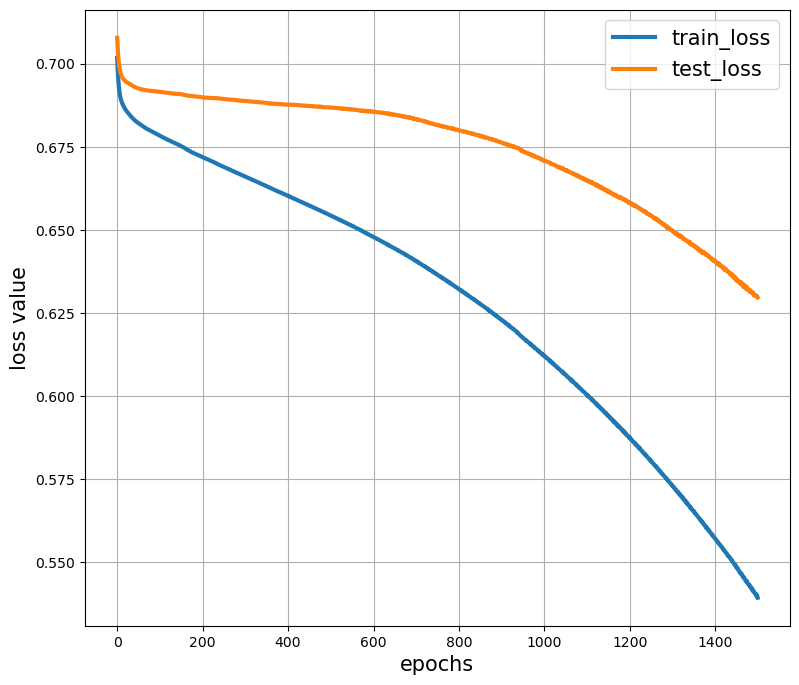

[1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0
 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1
 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0]


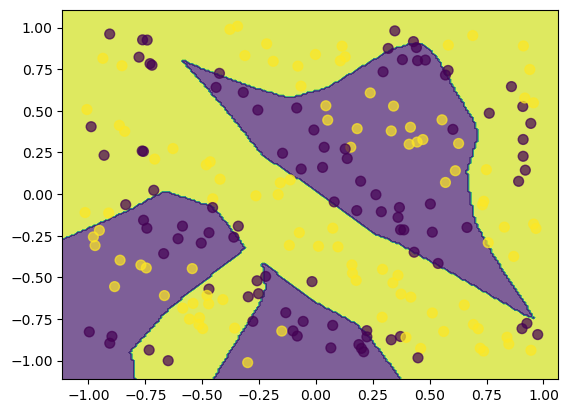

In [10]:
#deliverable 5- experimenting with various optimizers
#optimizer == momentum
x_train, y_train, x_test, y_test = sample_data('sinusoid', 200, 200, 0)
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)


n_epochs = 1500
mlp = MLP(4, [2, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'momentum')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(x_test)
print(preds)
plot_decision_boundary(x_test, y_test, predict_fn)
plt.show()  

loss: 0.7219305887653437
loss: 0.7103650986175012
loss: 0.7073318165861706
loss: 0.7052958707050624
loss: 0.7030957070297933
loss: 0.7022472890598226
loss: 0.7020560472335398
loss: 0.7011829132290388
loss: 0.6999094691741959
loss: 0.6990484253385796
loss: 0.6979723057186967
loss: 0.6970672167992075
loss: 0.6960871458279178
loss: 0.6944623123856647
loss: 0.6944066611931887
loss: 0.6936144064231198
loss: 0.6926875046567446
loss: 0.6918136857397414
loss: 0.6909563001780978
loss: 0.6906985679959249
loss: 0.6889141784334128
loss: 0.6887458369998097
loss: 0.6876160864604225
loss: 0.6863065539027466
loss: 0.685842419040858
loss: 0.6852882857057623
loss: 0.6845868853487922
loss: 0.682913970986796
loss: 0.6828617328875268
loss: 0.6821673931013001
loss: 0.681568989675568
loss: 0.6802535897298883
loss: 0.6795988239707778
loss: 0.6792066341702173
loss: 0.6781684881756428
loss: 0.6770690232128055
loss: 0.6760362121141316
loss: 0.6754707784246966
loss: 0.6743500617081666
loss: 0.6737452698966085
los

loss: 0.5443676017797188
loss: 0.5438019951803525
loss: 0.5414273321808812
loss: 0.5426060732409501
loss: 0.5424630865781351
loss: 0.5417388529022119
loss: 0.5416836650584078
loss: 0.5415202351389309
loss: 0.5407403815733626
loss: 0.5401523309519729
loss: 0.5400366888231563
loss: 0.5394351662199571
loss: 0.539576329204166
loss: 0.5387210528011306
loss: 0.5387882481646935
loss: 0.5383090292245022
loss: 0.5381315081501813
loss: 0.5373214471114639
loss: 0.5368575314032384
loss: 0.5366571258975458
loss: 0.5363391004269827
loss: 0.5359834760483713
loss: 0.5353708724777815
loss: 0.5350702720107274
loss: 0.5350394464717219
loss: 0.5341670267799443
loss: 0.5333861589221869
loss: 0.5333717627794414
loss: 0.5330299275405086
loss: 0.5330158067495065
loss: 0.5321666393333276
loss: 0.5318478986042205
loss: 0.5317177545347712
loss: 0.5320004475451608
loss: 0.5301508692284658
loss: 0.5311148065227598
loss: 0.5300390782716242
loss: 0.528920777301171
loss: 0.5302766508436509
loss: 0.5281221002322766
lo

loss: 0.36681680503657804
loss: 0.36530121334093096
loss: 0.36576770180329654
loss: 0.3639801201091673
loss: 0.36471127394187236
loss: 0.36406317700433505
loss: 0.36316337192419895
loss: 0.36200173405146663
loss: 0.3627767324864053
loss: 0.3610419745271853
loss: 0.3622805266558478
loss: 0.3607519645406343
loss: 0.35962886027987634
loss: 0.35976137948138204
loss: 0.3602108519083822
loss: 0.3577730616942113
loss: 0.35845520391644564
loss: 0.3562973091977418
loss: 0.3575769706888438
loss: 0.35750226256328543
loss: 0.35418265227743967
loss: 0.35353296144162644
loss: 0.3534286006265384
loss: 0.35223311342577346
loss: 0.35303844668692685
loss: 0.35153633449570904
loss: 0.35253471549755233
loss: 0.34930177921455213
loss: 0.3521266495086621
loss: 0.3492706364163928
loss: 0.34888778216090427
loss: 0.3492806372074362
loss: 0.34722623740440883
loss: 0.3481122801476257
loss: 0.34671271854013314
loss: 0.3467893337714662
loss: 0.34616568370534173
loss: 0.3460031399041414
loss: 0.3459597715150128
los

loss: 0.21153089358357643
loss: 0.2018044599421841
loss: 0.20565623048933326
loss: 0.20568350900347995
loss: 0.19781194594145796
loss: 0.20598085977988612
loss: 0.20306027375452437
loss: 0.20396882512074896
loss: 0.2069840512772779
loss: 0.20143840873788085
loss: 0.20294064373678286
loss: 0.19938041146666408
loss: 0.1987731712848654
loss: 0.2050428524783378
loss: 0.1961401017409255
loss: 0.20107606530440042
loss: 0.19644109127036088
loss: 0.2020171900991187
loss: 0.200443055675337
loss: 0.19781976660432293
loss: 0.20322229417298296
loss: 0.19519388899379517
loss: 0.20231965745162156
loss: 0.19264185415505886
loss: 0.1995514210087431
loss: 0.1982148992670556
loss: 0.19341875850647283
loss: 0.20199508946214104
loss: 0.1878671862342573
loss: 0.19754500126903668
loss: 0.19940276785237693
loss: 0.1927418137831901
loss: 0.19226655429930517
loss: 0.19374449589672654
loss: 0.19410486666991836
loss: 0.19512724184987207
loss: 0.19376508849099325
loss: 0.1972596206097613
loss: 0.1864101551835792


loss: 0.12581607461289052
loss: 0.12681113311519387
loss: 0.1283942500246331
loss: 0.12423474979673471
loss: 0.13497456617205913
loss: 0.12035945175245376
loss: 0.14392341118109006
loss: 0.12569744495995974
loss: 0.13438730566437324
loss: 0.129510885845472
loss: 0.12832446427872274
loss: 0.12707671808281415
loss: 0.1310250941701832
loss: 0.1291435197662742
loss: 0.13252631632828957
loss: 0.12976991320161171
loss: 0.12889119702519086
loss: 0.1297696777678674
loss: 0.12760911909743128
loss: 0.13203260138772643
loss: 0.13596677250122913
loss: 0.12799832135997388
loss: 0.13185429808754506
loss: 0.13321889167297646
loss: 0.12456990123026515
loss: 0.12658987406436573
loss: 0.13032789016337099
loss: 0.12892289170772273
loss: 0.13131589955623105
loss: 0.12911951499948604
loss: 0.13132294453618695
loss: 0.1308856188523737
loss: 0.12575246817989158
loss: 0.12378383300853031
loss: 0.12652289969459962
loss: 0.1344278189095779
loss: 0.12310597179899267
loss: 0.12932445894943695
loss: 0.124561679344

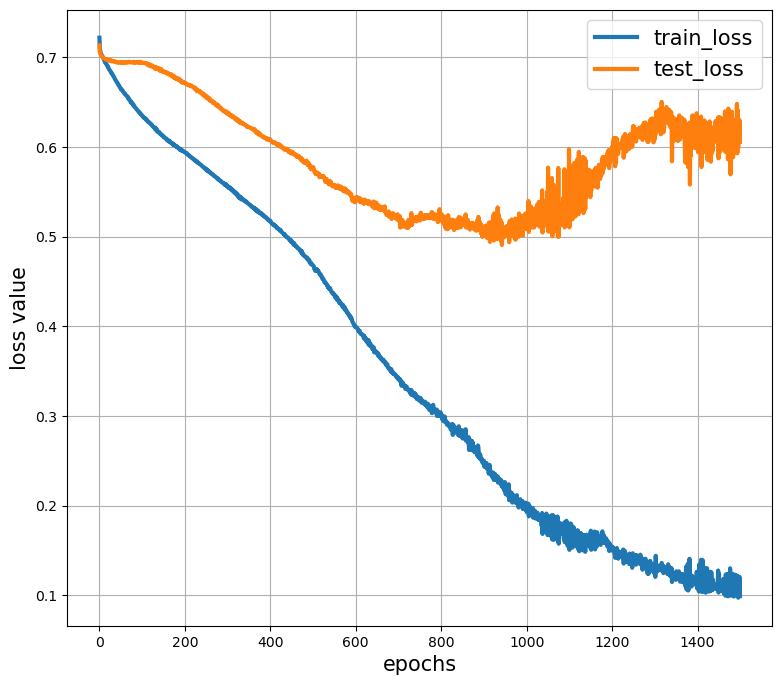

[1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1
 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1]


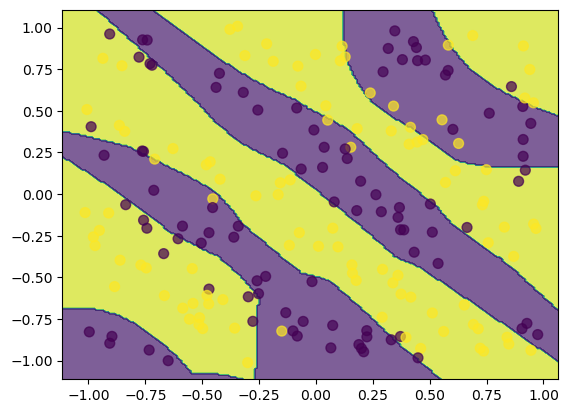

In [11]:
#deliverable 5- experimenting with various optimizers
#optimizer == adam
x_train, y_train, x_test, y_test = sample_data('sinusoid', 200, 200, 0)
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)


n_epochs = 1500
mlp = MLP(4, [2, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'adam')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(x_test)
print(preds)
plot_decision_boundary(x_test, y_test, predict_fn)
plt.show()  

loss: 0.7085009510759218
loss: 0.7058027028342536
loss: 0.7049816706337202
loss: 0.7041015913861501
loss: 0.7023172448747297
loss: 0.7014349974147123
loss: 0.6999776471719872
loss: 0.6995265579775801
loss: 0.6985619416489851
loss: 0.6979779856862254
loss: 0.6969644190031269
loss: 0.6957784427983352
loss: 0.6946572473779835
loss: 0.6929129909422588
loss: 0.6923798092956522
loss: 0.690592918185398
loss: 0.6889403918915973
loss: 0.6881201851840555
loss: 0.6866618351656871
loss: 0.6842295882439308
loss: 0.6830823004902707
loss: 0.680986997660248
loss: 0.6793526314667355
loss: 0.6775015180259197
loss: 0.675840950061077
loss: 0.6736028134880604
loss: 0.6707951222776825
loss: 0.668873052127063
loss: 0.6660253377050956
loss: 0.6637263463866937
loss: 0.6611940969174688
loss: 0.6585912876173589
loss: 0.6560837458805631
loss: 0.6535229439789603
loss: 0.6505963315543734
loss: 0.6483063899445551
loss: 0.6454843693088609
loss: 0.6431813509769853
loss: 0.6403144935866463
loss: 0.6373846830649786
loss

loss: 0.39606507482525766
loss: 0.39785738000178084
loss: 0.39590224397216106
loss: 0.3978124614540126
loss: 0.40604253335834495
loss: 0.3995068524590073
loss: 0.39365234738462074
loss: 0.3970435855829112
loss: 0.4026327702788095
loss: 0.4059838604807765
loss: 0.39364707194606424
loss: 0.3982276255254726
loss: 0.3900796685551759
loss: 0.40348286297523794
loss: 0.3913187849824709
loss: 0.39894375013728994
loss: 0.3890019365273945
loss: 0.4108893311216113
loss: 0.38915426621158206
loss: 0.3904147921119466
loss: 0.40165410032834
loss: 0.39026435254808123
loss: 0.4016804141598626
loss: 0.38700391983774407
loss: 0.4041105838980609
loss: 0.3874319509993011
loss: 0.4034382266080563
loss: 0.3903350162029005
loss: 0.40338394081027645
loss: 0.3909543386421388
loss: 0.4013732827136164
loss: 0.39013646099371285
loss: 0.4034912572515559
loss: 0.38975805651969664
loss: 0.3994860200900218
loss: 0.3883581530558263
loss: 0.4023836809321875
loss: 0.3888232750134301
loss: 0.40001868317825456
loss: 0.3851

loss: 0.2713439628103441
loss: 0.27322040709783285
loss: 0.2711383642636694
loss: 0.27122396932566006
loss: 0.26922687982140536
loss: 0.2719294150479092
loss: 0.2705068534219254
loss: 0.2695443638668116
loss: 0.2719912348244533
loss: 0.2675917685290428
loss: 0.2699048983833119
loss: 0.2680202968051826
loss: 0.2687572897891453
loss: 0.27542446835003603
loss: 0.26826644893526713
loss: 0.26916507607272044
loss: 0.26674665392665986
loss: 0.26578914182595814
loss: 0.2672596572252783
loss: 0.26547390863860976
loss: 0.2664940781614018
loss: 0.26455202493010077
loss: 0.264964844201494
loss: 0.2660431200054297
loss: 0.2647799270540917
loss: 0.2689802649169261
loss: 0.26330053569712375
loss: 0.26451222609136105
loss: 0.26405965331575265
loss: 0.26374331041484866
loss: 0.2633907227921334
loss: 0.2635347074591814
loss: 0.263418021501191
loss: 0.26433433054580413
loss: 0.2695635041327927
loss: 0.26396395727842076
loss: 0.26267861902873885
loss: 0.2630648895926161
loss: 0.2621637547258562
loss: 0.26

loss: 0.2434695290091273
loss: 0.24298985299396839
loss: 0.24468023662125002
loss: 0.24665269156320752
loss: 0.24403869351309232
loss: 0.24357709200644886
loss: 0.24420017184819812
loss: 0.2406836318530023
loss: 0.24624298125685853
loss: 0.24444389279779444
loss: 0.24369821924059906
loss: 0.246274024136867
loss: 0.2438725737091213
loss: 0.23988540875111025
loss: 0.24251115503025225
loss: 0.23993764585851493
loss: 0.2437916557895315
loss: 0.24873592180536785
loss: 0.24213461983520532
loss: 0.24323471657565052
loss: 0.24046341908098257
loss: 0.2469077675176951
loss: 0.24231162716037616
loss: 0.24705983656580446
loss: 0.2447201765290529
loss: 0.24464881359249482
loss: 0.24638909725396785
loss: 0.24049542617957367
loss: 0.24635582730687675
loss: 0.24424064909260598
loss: 0.2452636207171709
loss: 0.24103344558542886
loss: 0.24075472927231048
loss: 0.24565944431105735
loss: 0.24544242648428458
loss: 0.24356938743522094
loss: 0.24414520446145693
loss: 0.24530186409354762
loss: 0.2411170379420

loss: 0.22758761756097365
loss: 0.22559509291111135
loss: 0.22820401410401728
loss: 0.22276114446453968
loss: 0.2262620124161999
loss: 0.22769359088713045
loss: 0.2282993677414015
loss: 0.224674523760258
loss: 0.22696752957078992
loss: 0.2249839836337629
loss: 0.2207387747766681
loss: 0.22929674530617303
loss: 0.22426626815578346
loss: 0.2278017456299113
loss: 0.22626696912841315
loss: 0.2221825509422256
loss: 0.22536979293546147
loss: 0.22702581183220055
loss: 0.22613645297537416
loss: 0.22417539866267625
loss: 0.2220431925553523
loss: 0.22348668127562676
loss: 0.22507235338530504
loss: 0.21953500253996672
loss: 0.2239611060608069
loss: 0.2255143414163936
loss: 0.2280612329941026
loss: 0.22232669573662128
loss: 0.22728162953646744
loss: 0.22138113736172965
loss: 0.2252801847649755
loss: 0.22395236657148426
loss: 0.22528843193516093
loss: 0.2263286903562117
loss: 0.22621228225565673
loss: 0.22623641434975084
loss: 0.22384467422169854
loss: 0.22390229350381893
loss: 0.22341240944762908


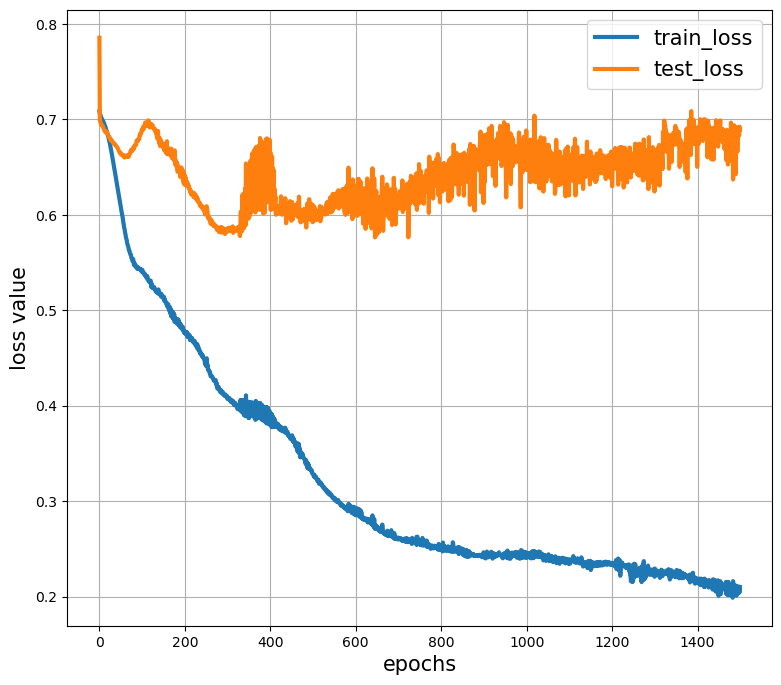

[1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0
 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]


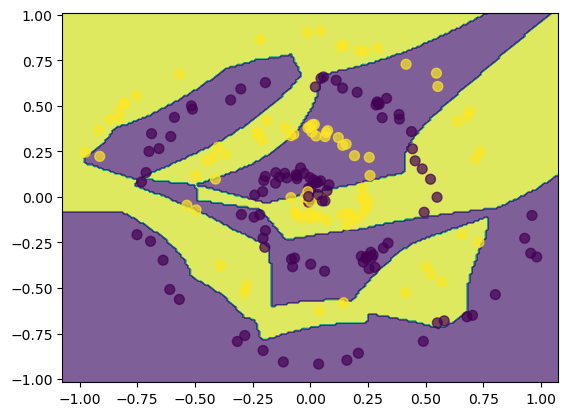

In [12]:
#deliverable 6- swiss roll with adam
#optimizer == adam
x_train, y_train, x_test, y_test = sample_data('swiss-roll', 200, 200, 0)
X_train = np.array(x_train)
y_train = np.array(y_train)
X_test = np.array(x_test)
y_test = np.array(y_test)


n_epochs = 1500
mlp = MLP(4, [2, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'adam')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(x_test)
print(preds)
plot_decision_boundary(x_test, y_test, predict_fn)
plt.show()  

loss: 0.6693747459837626
loss: 0.5862969778552708
loss: 0.500572422688016
loss: 0.4057571011059396
loss: 0.31453935536820954
loss: 0.23703115835197644
loss: 0.17688706350713637
loss: 0.13330212133381938
loss: 0.10305674712347415
loss: 0.07871369919877169
loss: 0.05924738652906351
loss: 0.05027011968345236
loss: 0.04872104127151609
loss: 0.047542182470894284
loss: 0.045059233169414556
loss: 0.04234532314806711
loss: 0.038962383607667864
loss: 0.03658659137035796
loss: 0.03389462545103541
loss: 0.0321738038565497
loss: 0.03019601210140366
loss: 0.028236879825239355
loss: 0.027391707912107526
loss: 0.02618038751820349
loss: 0.02552427531441622
loss: 0.02551983815317162
loss: 0.0244926329132291
loss: 0.023575692506501537
loss: 0.022351755814332953
loss: 0.022218782471096637
loss: 0.020640836990678677
loss: 0.02000975727378842
loss: 0.018851680272707057
loss: 0.018299365657964795
loss: 0.018046263448458107
loss: 0.01721030934555048
loss: 0.01655503268278171
loss: 0.016146222417228594
loss: 

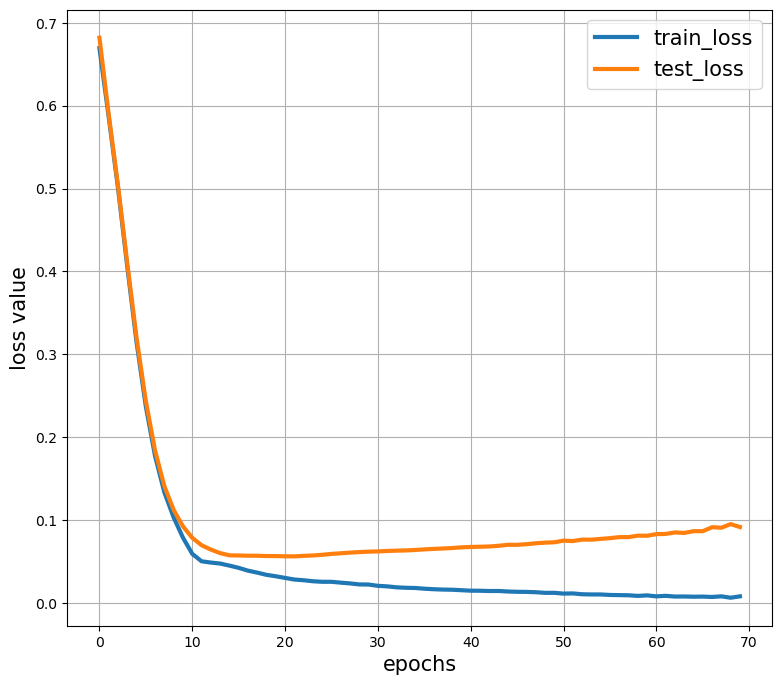

In [32]:
#deliverable7
#XOR
X_train, y_train, X_test, y_test = sample_data('XOR', 200, 200, 0)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
non_linear_col_train = np.sum((X_train[:]**2), axis =1)
non_linear_col_test = np.sum((X_test[:]**2), axis = 1)
X_train_non_linear = np.column_stack((X_train, non_linear_col_train))
X_test_non_linear = np.column_stack((X_test, non_linear_col_test))

n_epochs = 70
mlp = MLP(4, [3, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'adam')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train_non_linear[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test_non_linear[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

In [33]:
def plot_decision_boundary_non_linear(X, y, pred_fn, boundry_level=None):
    """
    Plots the decision boundary for the model prediction
    :param X: input data
    :param y: true labels
    :param pred_fn: prediction function,  which use the current model to predict。. i.e. y_pred = pred_fn(X)
    :boundry_level: Determines the number and positions of the contour lines / regions.
    :return:
    """
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = pred_fn(np.c_[xx.ravel(), yy.ravel(), xx.ravel()*yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7, levels=boundry_level, cmap='viridis_r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), alpha=0.7,s=50, cmap='viridis_r',)

[1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0
 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0]


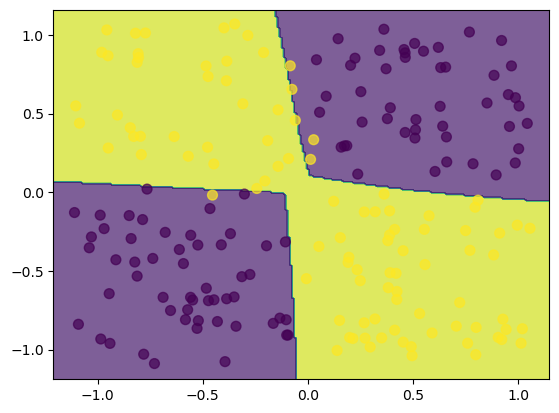

In [34]:
def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(X_test_non_linear)
print(preds)
plot_decision_boundary_non_linear(X_test, y_test, predict_fn)

loss: 0.4610706132180345
loss: 0.35350879698841653
loss: 0.2913798959278684
loss: 0.23251806827192842
loss: 0.17724573607756958
loss: 0.14194105766373014
loss: 0.11835702921832182
loss: 0.10400030997363327
loss: 0.09609578687471988
loss: 0.09331564257110113
loss: 0.09140344476215308
loss: 0.0901288116770716
loss: 0.08979227488927577
loss: 0.0903097012718716
loss: 0.09066954057046839
loss: 0.09154364987820159
loss: 0.09216273377218233
loss: 0.09348260936662699
loss: 0.09344255447719946
loss: 0.09451973136908247
loss: 0.09570049586254903
loss: 0.09672073704482825
loss: 0.09737221974950558
loss: 0.09808610258567013
loss: 0.10041059841967055
loss: 0.10022623350356852
loss: 0.10113631867941109
loss: 0.10377827987580847
loss: 0.10156460309827015
loss: 0.1056708686696522
loss: 0.10502368214197527
loss: 0.10710456260443134
loss: 0.105426302397487
loss: 0.10829480606310912
loss: 0.1065661797107901
loss: 0.1060834310626339
loss: 0.11220631720103424
loss: 0.11107586000323383
loss: 0.1094739257346

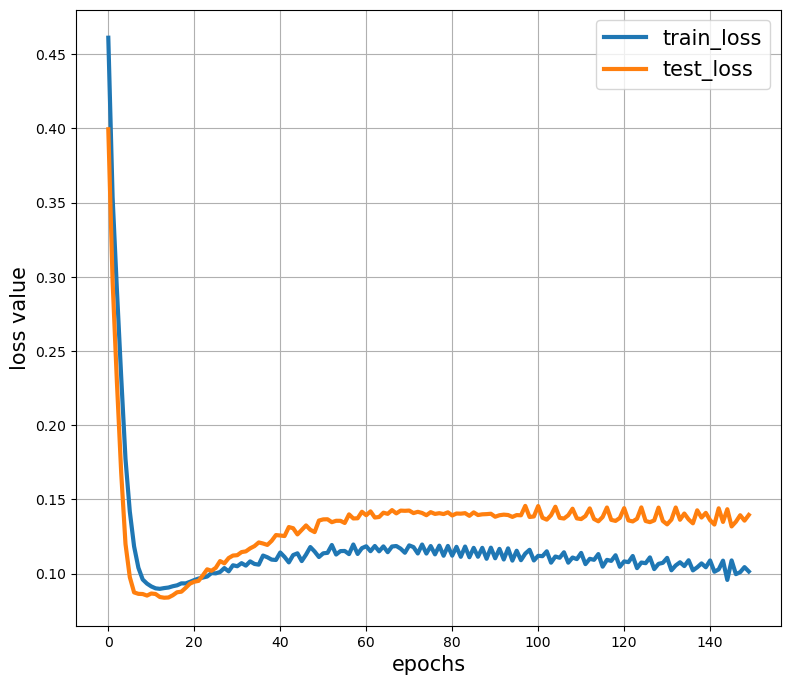

[1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0]


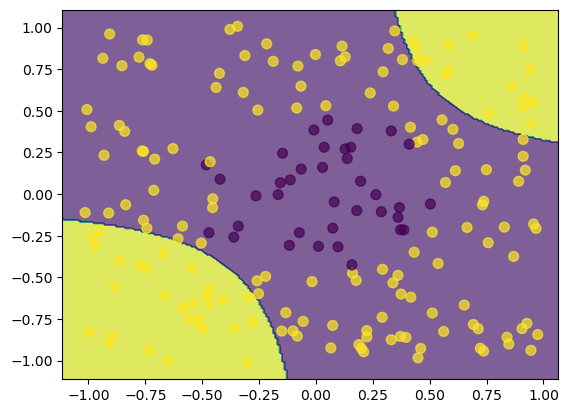

In [49]:
#deliverable7
#circle
X_train, y_train, X_test, y_test = sample_data('circle', 200, 200, 0)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
non_linear_col_train = np.sum((X_train[:]**2), axis =1)
non_linear_col_test = np.sum((X_test[:]**2), axis = 1)
X_train_non_linear = np.column_stack((X_train, non_linear_col_train))
X_test_non_linear = np.column_stack((X_test, non_linear_col_test))

n_epochs = 150
mlp = MLP(4, [3, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'adam')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train_non_linear[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test_non_linear[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()
def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(X_test_non_linear)
print(preds)
plot_decision_boundary_non_linear(X_test, y_test, predict_fn)

loss: 0.7050815985537853
loss: 0.7085334468940127
loss: 0.7052070480320629
loss: 0.7014897868795192
loss: 0.6970136251673457
loss: 0.6917773389816199
loss: 0.687512234625924
loss: 0.6815228350036615
loss: 0.6759726204943094
loss: 0.6698126770552126
loss: 0.6621467141324245
loss: 0.6543088849767511
loss: 0.6458208656126004
loss: 0.6377013674230726
loss: 0.6285792520606326
loss: 0.6202000068625353
loss: 0.6117115555369879
loss: 0.6045346289112138
loss: 0.5971255439380405
loss: 0.5886388058917504
loss: 0.5822996143986807
loss: 0.5760469595801121
loss: 0.5674748087318047
loss: 0.5644817410469232
loss: 0.5577384679632991
loss: 0.5543161950040926
loss: 0.549924081067522
loss: 0.5458675840594264
loss: 0.5447986902911406
loss: 0.5417965609920031
loss: 0.5390196999279432
loss: 0.5370468519245466
loss: 0.5352277617534351
loss: 0.5347035932108328
loss: 0.5300254136523193
loss: 0.5271013601849642
loss: 0.5255701968706077
loss: 0.5237190655599521
loss: 0.5198207120918988
loss: 0.5172679885092663
lo

loss: 0.0615444545432561
loss: 0.060364178188905306
loss: 0.06243805753070711
loss: 0.06095769114359818
loss: 0.06087011466530308
loss: 0.0605105705113154
loss: 0.06034003091784244
loss: 0.059056398813053274
loss: 0.060039690442362056
loss: 0.0587930012523224
loss: 0.0585750670974827
loss: 0.05921682607752212
loss: 0.059199813604151934
loss: 0.058404334208101455
loss: 0.05878735975317509
loss: 0.058498415647174874
loss: 0.057875836881588524
loss: 0.058253502031064205
loss: 0.057733436964239555
loss: 0.0577754630797957
loss: 0.05850798141566239
loss: 0.05816414675165543
loss: 0.05736164441957839
loss: 0.057384574331633645
loss: 0.057931057073674526
loss: 0.05817328055750735
loss: 0.05723544867810519
loss: 0.057451213588530774


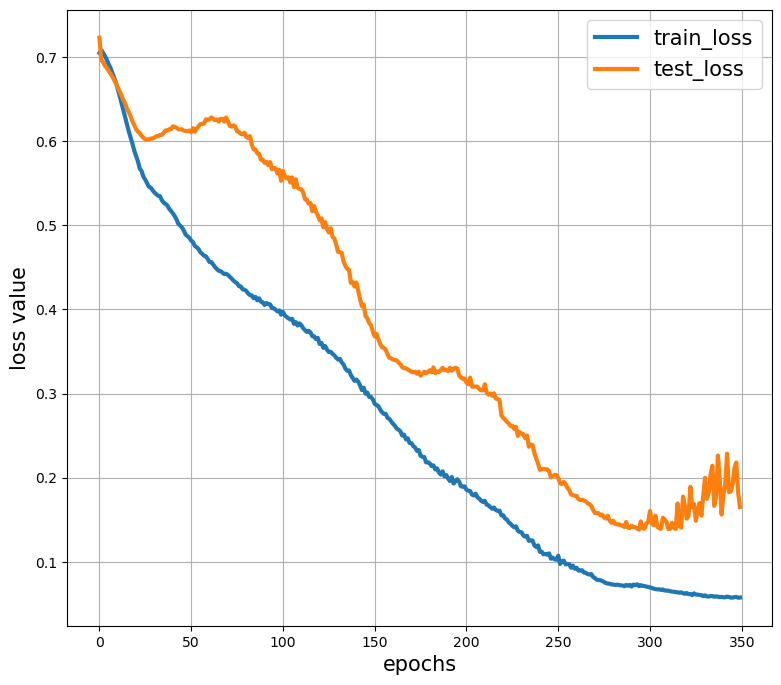

[1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1
 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1]


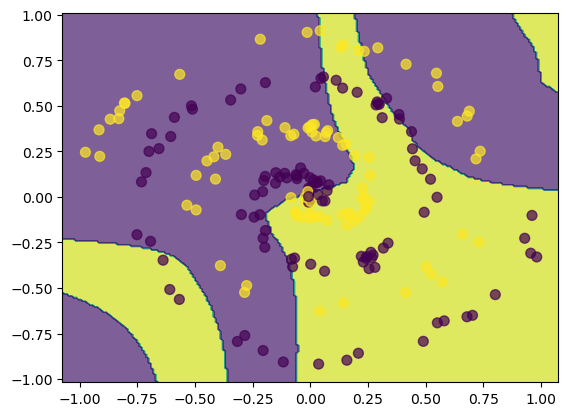

In [39]:
#deliverable7
#circle
X_train, y_train, X_test, y_test = sample_data('swiss-roll', 200, 200, 0)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
sinx_X_train = np.sin(X_train)
cosx_X_train = np.cos(X_train)
sinx_X_test = np.sin(X_test)
cosx_X_test = np.cos(X_test)
non_linear_col_train = np.sum((X_train[:]**2), axis =1)
non_linear_col_test = np.sum((X_test[:]**2), axis = 1)
X_train_non_linear = np.column_stack((X_train, non_linear_col_train))
X_test_non_linear = np.column_stack((X_test, non_linear_col_test))

n_epochs = 350
mlp = MLP(4, [3, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'adam')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train_non_linear[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test_non_linear[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()
def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(X_test_non_linear)
print(preds)
plot_decision_boundary_non_linear(X_test, y_test, predict_fn)

loss: 0.7006202162408757
loss: 0.7086060151947801
loss: 0.7061994260732072
loss: 0.7050418544316163
loss: 0.704434459993256
loss: 0.7029396214463912
loss: 0.7028859175806662
loss: 0.7004714060692003
loss: 0.6994946022813633
loss: 0.6983472473685248
loss: 0.697195269196046
loss: 0.6956589071934474
loss: 0.6951933401993051
loss: 0.6945160213784928
loss: 0.6938890145120422
loss: 0.6929488790639564
loss: 0.6918095608377022
loss: 0.6909568790501355
loss: 0.6902194744511977
loss: 0.6891230436115235
loss: 0.6874031498255966
loss: 0.6871586730608596
loss: 0.6851242564586308
loss: 0.6840400460852598
loss: 0.6824494544854326
loss: 0.682979580192775
loss: 0.6808420407149902
loss: 0.6787315963751877
loss: 0.6771688062280723
loss: 0.6745214538356277
loss: 0.6734536723586825
loss: 0.6711940068018103
loss: 0.6682141434987201
loss: 0.6663020339285524
loss: 0.6643671715481639
loss: 0.6605782109264218
loss: 0.6576760823519091
loss: 0.6551020583565478
loss: 0.652182261805105
loss: 0.6489445851184504
loss

loss: 0.3673752324813988
loss: 0.36712719705536306
loss: 0.36569446549879003
loss: 0.3670215603389934
loss: 0.3620911494032035
loss: 0.36092658866835103
loss: 0.36009213236342474
loss: 0.36136894999330943
loss: 0.35580371256893545
loss: 0.3572926033060168
loss: 0.35518609683021424
loss: 0.3551282924325211
loss: 0.3562043780516646
loss: 0.3558213559172508
loss: 0.3545754461873716
loss: 0.3520292996255358
loss: 0.3467280456308629
loss: 0.34565471200654957
loss: 0.3450038672470253
loss: 0.3425564883751472
loss: 0.34314720740601035
loss: 0.33952407877386903
loss: 0.34662037025531517
loss: 0.3444401664756839
loss: 0.3394998989614724
loss: 0.33831724498496457
loss: 0.33742004324607544
loss: 0.3369921208104782
loss: 0.33605928405961377
loss: 0.3361833758470819
loss: 0.3337570928566137
loss: 0.3320953294483712
loss: 0.33185015172123095
loss: 0.3308699455665659
loss: 0.32855143435921436
loss: 0.3280591529563597
loss: 0.3270383194095045
loss: 0.3269146857958606
loss: 0.3248294810379002
loss: 0.3

loss: 0.12435260956031784
loss: 0.12571291699460674
loss: 0.12276144120612895
loss: 0.1267387081106951
loss: 0.12409028579465779
loss: 0.12346270515114925
loss: 0.12897324255175946
loss: 0.12371945964676304
loss: 0.12575625201285248
loss: 0.1232074401093371
loss: 0.12226858456952129
loss: 0.12605673324767785
loss: 0.12348865422857908
loss: 0.12411920274844196
loss: 0.1259419868329551
loss: 0.12431671534682907
loss: 0.12601661537741002
loss: 0.1255946669844037
loss: 0.12455799642114225
loss: 0.1271337410912625
loss: 0.12431336788173925
loss: 0.12592277755512205
loss: 0.12575222455111978
loss: 0.12858615220062944
loss: 0.12480652385852702
loss: 0.12776734628514655
loss: 0.12474363712149941
loss: 0.1259905279186212
loss: 0.12709531479582079
loss: 0.12510287352804753
loss: 0.12577599972884998
loss: 0.12740503645362355
loss: 0.12751292726430774
loss: 0.12694539861859688
loss: 0.12632074778368818
loss: 0.12900710957303121
loss: 0.1268088746904062
loss: 0.125277169368444
loss: 0.1295038850824

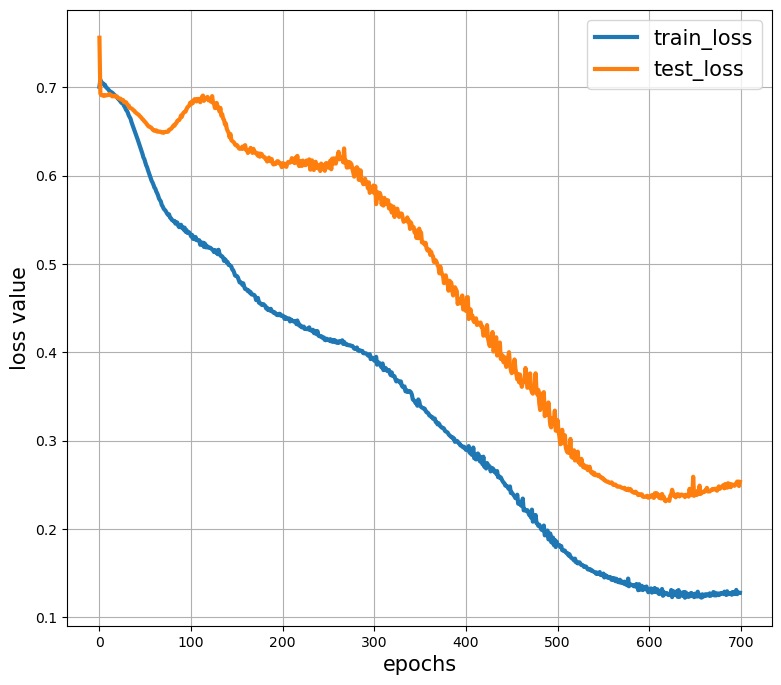

In [41]:
#swiss roll with more than one non linear layer
X_train, y_train, X_test, y_test = sample_data('swiss-roll', 200, 200, 0)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
sinx = np.sin(X_train)
cosx = np.cos(X_train)
sinx_test = np.sin(X_test)
cosx_test = np.cos(X_test)
X_train_non_linear = np.column_stack((X_train, sinx, cosx))
X_test_non_linear = np.column_stack((X_test, sinx_test, cosx_test))
n_epochs = 700
mlp = MLP(4, [6, 50,100,1], 'He', ['sigmoid', 'relu', 'sigmoid', 'sigmoid'], 'cross_entropy_loss', 'adam')

losses = {'train_loss': [], 'test_loss': []}
for epoch in range(n_epochs):
    train_loss = []
    test_loss = []

    for i in range(len(X_train)):
        output = mlp.forward(X_train_non_linear[i])
        loss_val, loss_der = mlp.loss_fnc(output, y_train[i])
        mlp.backward(loss_der)
        mlp.gradient_descent()
        train_loss.append(loss_val)
        output_test = mlp.forward(X_test_non_linear[i])
        loss_val_test, _ = mlp.loss_fnc(output_test, y_test[i])
        test_loss.append(loss_val_test)
    print(f'loss: {np.mean(train_loss)}')
    losses['train_loss'].append(np.mean(train_loss))
    losses['test_loss'].append(np.mean(test_loss))

plot_loss(losses)
plt.show()

In [47]:
def plot_decision_boundary_non_linear_swiss_roll(X, y, pred_fn, boundry_level=None):
    """
    Plots the decision boundary for the model prediction
    :param X: input data
    :param y: true labels
    :param pred_fn: prediction function,  which use the current model to predict。. i.e. y_pred = pred_fn(X)
    :boundry_level: Determines the number and positions of the contour lines / regions.
    :return:
    """
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = pred_fn(np.c_[xx.ravel(), yy.ravel(), np.sin(xx.ravel()), np.sin(yy.ravel()), np.cos(xx.ravel()), np.cos(yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.7, levels=boundry_level, cmap='viridis_r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), alpha=0.7,s=50, cmap='viridis_r',)

[1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1
 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0
 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0
 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1]


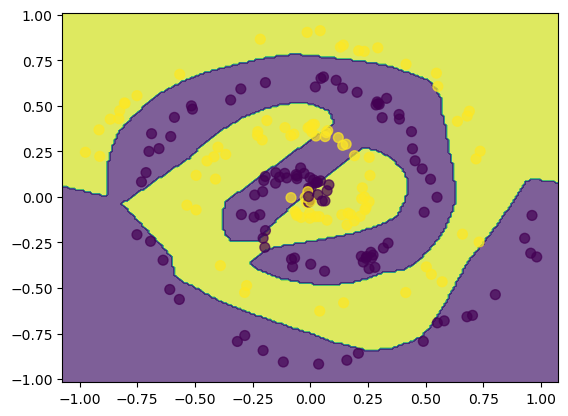

In [48]:
def predict_fn(X):
    predictions = []
    for i in range(len(X)):
        output = mlp.forward(X[i])
        prediction = 1 if output > 0.5 else 0 
        predictions.append(prediction)
    return np.array(predictions)

preds = predict_fn(X_test_non_linear)
print(preds)
plot_decision_boundary_non_linear_swiss_roll(X_test, y_test, predict_fn)